In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision/Images

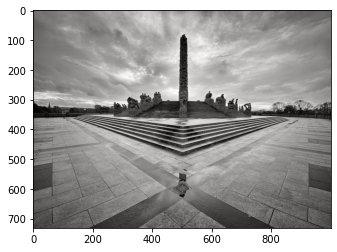

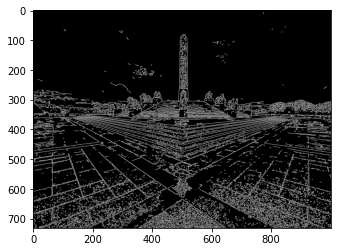

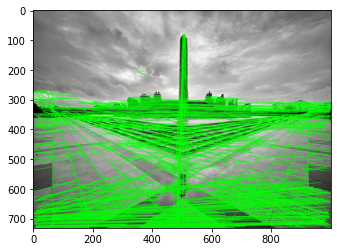

Number of lines detected: 671


In [4]:
image = cv2.imread('/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision/Images//chess1.jpeg')

h,w=image.shape[:2]
plt.imshow(image)
plt.show()

dst = cv2.Canny(image, 100, 150, None, 3)

plt.imshow(dst,cmap='gray')
plt.show()

linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 10, 50)
temp=image.copy()

for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv2.line(temp, (l[0], l[1]), (l[2], l[3]), (0,255,0), 1, cv2.LINE_AA)


plt.imshow(temp,cmap='gray')
plt.show()

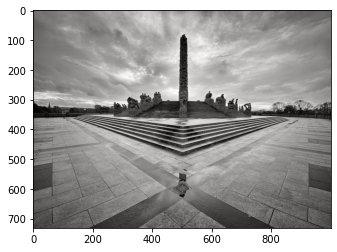

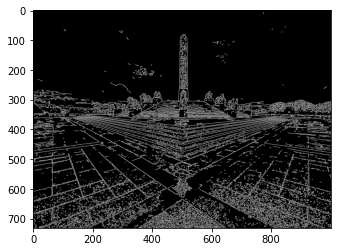

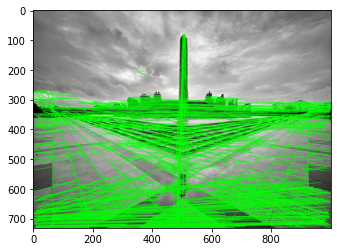

Number of lines detected: 671


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision/Dataset/Exam_Images/M-3.jpg')

# Display the original image
plt.imshow(image)
plt.show()

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 150, None, 3)

# Display the Canny edges
plt.imshow(edges, cmap='gray')
plt.show()

# Apply HoughLinesP
linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, None, 10, 50)
temp = image.copy()

# Draw lines on the image
for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv2.line(temp, (l[0], l[1]), (l[2], l[3]), (0, 255, 0), 1, cv2.LINE_AA)

# Display the image with detected lines
plt.imshow(temp)
plt.show()

# Count the number of lines
num_lines = len(linesP)
print("Number of lines detected:", num_lines)


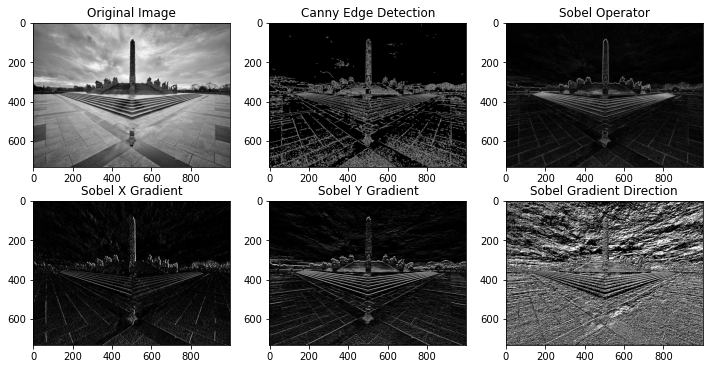

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision/Dataset/Exam_Images/M-3.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges_canny = cv2.Canny(image, 100, 150)

kernelx=np.array([[-1,0,1],
                  [-2,0,2],
                  [-1,0,1]])
kernely=np.array([[1,2,1,],
                  [0,0,0],
                  [-1,-2,-1]])

sobel_x=cv2.filter2D(image,-1,kernelx)
sobel_y=cv2.filter2D(image,-1,kernely)
sobel_img=sobel_x+sobel_y

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(231)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(232)
plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection')

plt.subplot(233)
plt.imshow(edges_sobel, cmap='gray')
plt.title('Sobel Operator')

plt.subplot(234)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X Gradient')

plt.subplot(235)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y Gradient')

plt.subplot(236)
plt.imshow(np.arctan2(sobel_y, sobel_x), cmap='gray')
plt.title('Sobel Gradient Direction')

plt.show()


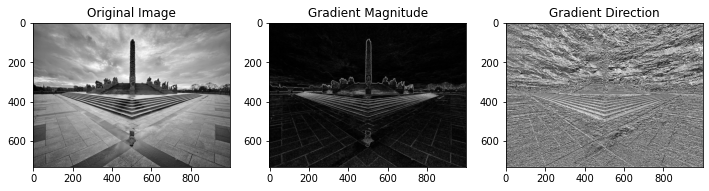

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision/Dataset/Exam_Images/M-3.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Sobel operator for gradient calculation
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Calculate magnitude and direction of gradients
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_direction = np.arctan2(sobel_y, sobel_x)

# Display the results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.subplot(133)
plt.imshow(gradient_direction, cmap='gray')
plt.title('Gradient Direction')

plt.show()


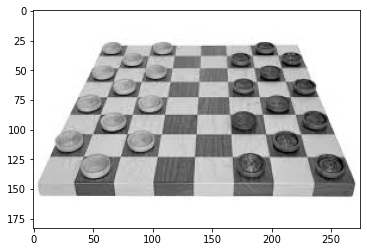

(183, 275)
Number of circles detected: 24


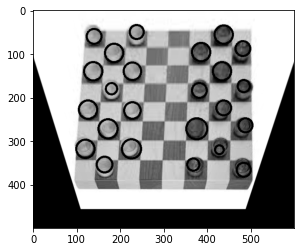

In [3]:
img = cv2.imread(r"/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision/Images//chess1.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,'gray')
plt.show()
print(gray.shape)

# geometric transformation
pts1 = np.float32(
        [[50, 30], # top left
         [222,30], # top right
         [5,150], # bottom left
         [270,150]] # bottom right
)

pts2 = np.float32(
        [[100,50], # top left
         [500,50], # top right
         [100,400], # bottom left
         [500,400]] # bottom right
)

matrix = cv2.getPerspectiveTransform(pts1,pts2)
result = cv2.warpPerspective(img, matrix, (600,500))
gray1 = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
#blurred = cv2.GaussianBlur(gray1, (3,3),cv2.BORDER_DEFAULT)

circles = cv2.HoughCircles(gray1, cv2.HOUGH_GRADIENT, dp=1, minDist=25, param1=70, param2=30, minRadius=1, maxRadius=45)

if circles is not None:
    num_circles = len(circles[0])
    print(f"Number of circles detected: {num_circles}")

    circles = np.uint16(np.around(circles))


    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]

        cv2.circle(gray1, center, radius, (0, 255, 0), 3)




plt.imshow(gray1, cmap='gray')
plt.show()